In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('data/heart.csv')

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [50]:
data.shape

(1025, 14)

In [51]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset contains 1,025 patient records with a balanced binary target variable indicating the presence of heart disease. Numerical features such as age, blood pressure, cholesterol, and maximum heart rate show realistic medical ranges and variability. Several features represent categorical clinical indicators encoded numerically, which require appropriate encoding. Overall, the dataset is well-suited for logistic regression with interpretable feature effects.

## Initial Data Analysis 


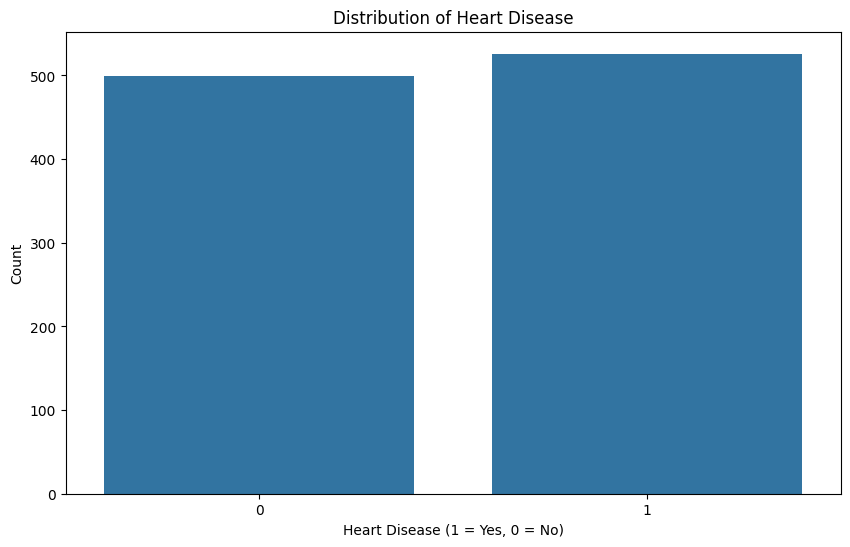

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')  
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


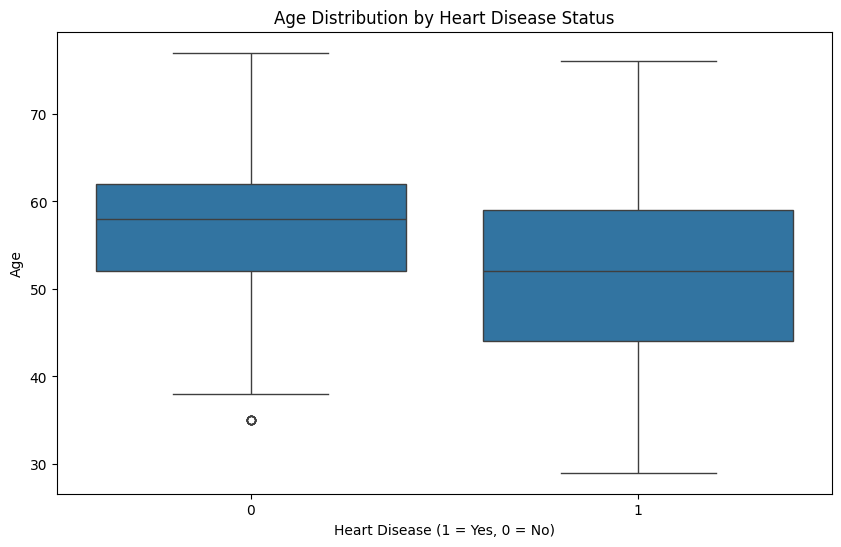

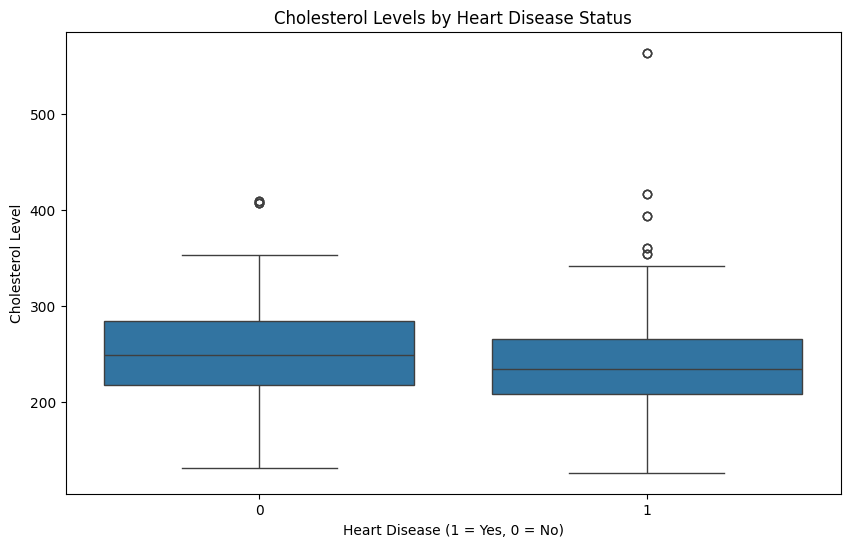

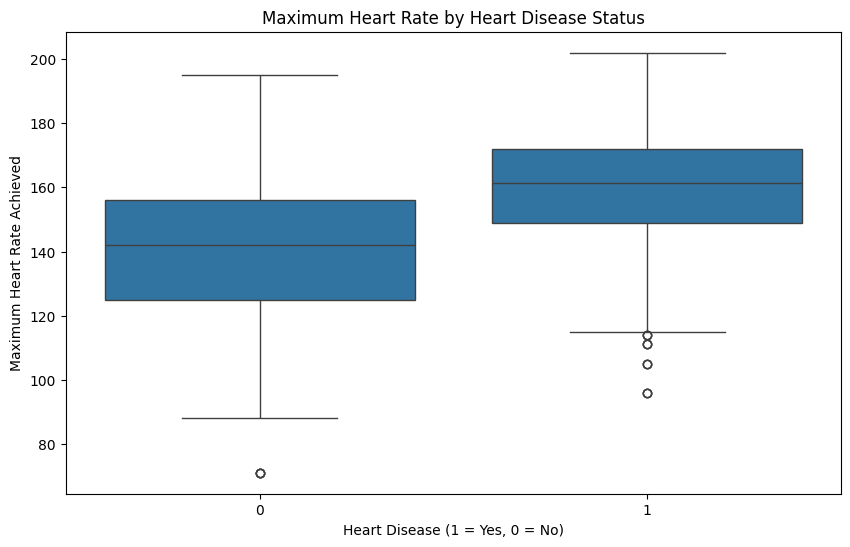

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution by Heart Disease Status')   
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='chol', data=data)   
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol Level')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()
plt.figure(figsize=(12,10))


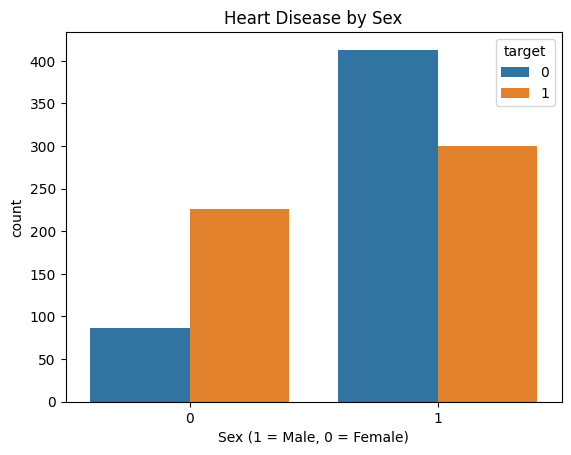

In [54]:
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.show()


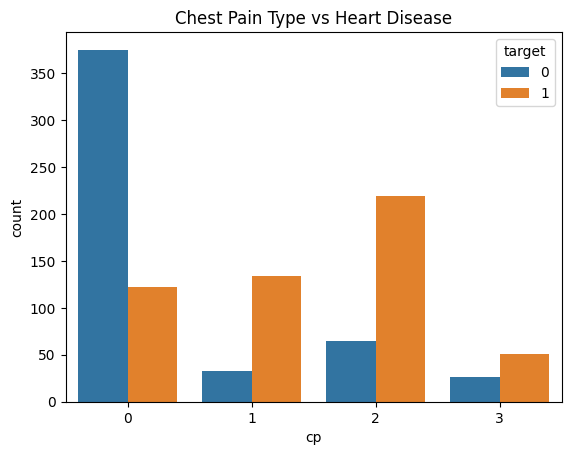

In [55]:
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


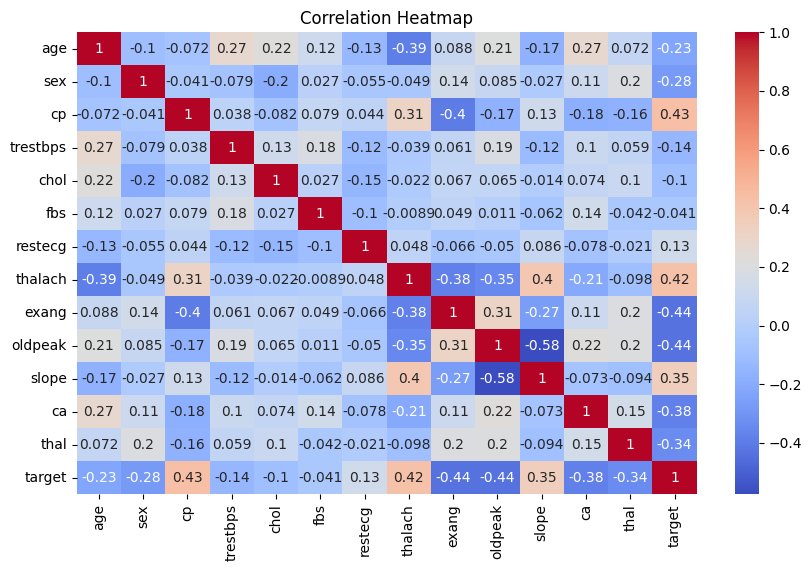

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


## Exploratory Data Analysis (EDA)

### Dataset Overview
The dataset contains 1,025 patient records with demographic, clinical, and diagnostic attributes related to heart health.  
The target variable (`target`) is binary:
- 1 → Presence of heart disease
- 0 → No heart disease

There are no missing values, and all features are numerically encoded.

---

### Univariate and Bivariate Analysis

Key numerical features such as `age`, `chol`, `thalach`, and `oldpeak` were analyzed using boxplots grouped by heart disease status.  
These visualizations revealed noticeable distributional differences between patients with and without heart disease, especially for `thalach` and `oldpeak`.

Categorical features such as `sex`, `cp`, and `exang` showed clear differences in class proportions when visualized against the target variable.

---

### Correlation Analysis

A correlation heatmap was used to examine linear relationships between features and the target variable.

**Strong positive correlations with heart disease:**
- `cp` (Chest pain type): 0.43
- `thalach` (Maximum heart rate achieved): 0.42
- `slope` (Slope of ST segment): 0.35

**Strong negative correlations with heart disease:**
- `exang` (Exercise-induced angina): −0.44
- `oldpeak` (ST depression): −0.44
- `ca` (Number of major vessels): −0.38
- `thal` (Thalassemia): −0.34

These results align with medical knowledge, where exercise tolerance, ECG abnormalities, and chest pain characteristics are strong indicators of heart disease.

---

### Multicollinearity Check

No extreme correlations were observed among predictor variables, indicating the absence of serious multicollinearity.  
This supports the suitability of logistic regression without requiring aggressive feature removal.

---

### Key EDA Insights

- The dataset is well-balanced and clean, with no missing values.
- Several features show strong linear relationships with the target.
- Both numerical and categorical variables contribute meaningful predictive signal.
- The dataset is well-suited for logistic regression modeling due to interpretability and moderate feature correlations.

---

### EDA Conclusion

Exploratory analysis confirms that the dataset is appropriate for building an interpretable logistic regression model.  
Key predictors such as chest pain type, heart rate response, ECG-derived measures, and exercise-induced symptoms provide strong discriminatory power for heart disease prediction.


## Preprocessing 

In [57]:
x = data.drop('target', axis=1)
y = data['target']

In [58]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [59]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [60]:
from sklearn.model_selection import train_test_split

# Using stratify to maintain the proportion of classes in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])

In [62]:
x_train = pd.get_dummies(x_train, columns=categorical_features, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_features, drop_first=True)

In [63]:
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [64]:
print(x_train.shape)
print(x_test.shape)

(820, 22)
(205, 22)


## Data Preprocessing

Before building the Logistic Regression model, the dataset was carefully preprocessed to ensure that the input features are in a form suitable for mathematical modeling and to avoid data leakage.

---

### 1. Train–Test Split

The dataset was first divided into training and testing sets.  
This step is performed **before any transformation** to prevent information from the test set influencing the training process.

- **Training set**: Used to learn model parameters
- **Test set**: Used only for final evaluation

This ensures a fair and unbiased assessment of model performance.

---

### 2. Feature–Target Separation

- **Features (X)**: All clinical attributes such as age, sex, chest pain type, cholesterol, heart rate, etc.
- **Target (y)**:  
  - `target = 1` → Presence of heart disease  
  - `target = 0` → No heart disease

Separating features and target allows independent preprocessing of input variables.

---

### 3. Identification of Categorical and Numerical Features

The dataset contains two types of features:

- **Categorical features** (encoded as integers but representing categories):
  - `sex`
  - `cp` (chest pain type)
  - `fbs`
  - `restecg`
  - `exang`
  - `slope`
  - `ca`
  - `thal`

- **Numerical features**:
  - `age`
  - `trestbps`
  - `chol`
  - `thalach`
  - `oldpeak`

Identifying feature types is essential because different preprocessing techniques are applied to categorical and numerical data.

---

### 4. One-Hot Encoding of Categorical Features

Logistic Regression is a linear, mathematical model that assumes numerical magnitude and order.  
However, categorical variables such as chest pain type or thalassemia are **labels**, not quantities.

To avoid incorrect assumptions (e.g., category `3` being treated as greater than category `1`), **One-Hot Encoding** was applied.

- Each category is converted into a separate binary feature (0 or 1)
- This allows the model to learn the influence of each category independently

The encoder was:
- **Fitted only on training data**
- **Applied to test data using the same learned structure**

This prevents column mismatch and data leakage.

---

### 5. Feature Scaling of Numerical Variables

Numerical features were scaled using **StandardScaler**.

- Logistic Regression is sensitive to feature scale
- Scaling ensures all numerical variables contribute equally
- Prevents features with large ranges (e.g., cholesterol) from dominating smaller ones (e.g., oldpeak)

StandardScaler was:
- **Fitted on training data**
- **Applied to test data**

---

### 6. Final Prepared Dataset

After preprocessing:
- Categorical features were properly encoded
- Numerical features were scaled
- Training and testing datasets had **identical feature structures**

This prepared dataset is now suitable for training a Logistic Regression model without bias or mathematical inconsistency.

---

### Outcome

The preprocessing pipeline ensures:
- No data leakage
- Correct handling of categorical variables
- Stable and interpretable Logistic Regression coefficients
- Production-ready feature representation


## Model Evaluation 


In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(x_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [75]:
y_predict = log_reg.predict(x_test)

In [76]:
y_pred_probability = log_reg.predict_proba(x_test)[:, 1]


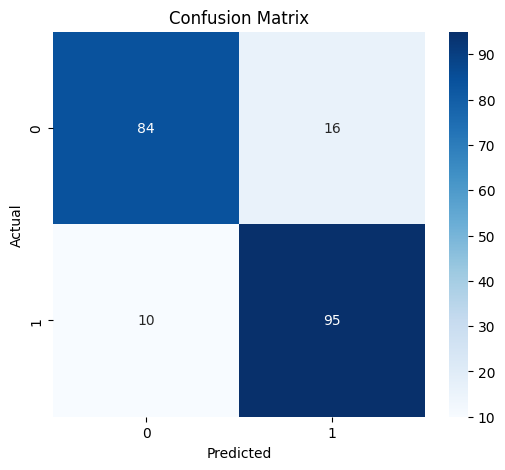

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall   :", recall_score(y_test, y_predict))
print("F1-score :", f1_score(y_test, y_predict))


Accuracy : 0.8731707317073171
Precision: 0.8558558558558559
Recall   : 0.9047619047619048
F1-score : 0.8796296296296297


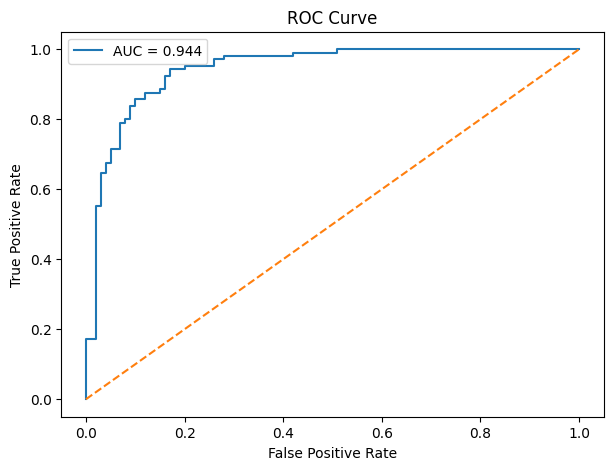

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
auc_score = roc_auc_score(y_test, y_pred_probability)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Model Evaluation & Results

The Logistic Regression model was evaluated using multiple classification metrics to ensure a reliable and medically meaningful assessment.

### Confusion Matrix Analysis
- True Positives (TP): 95  
- True Negatives (TN): 84  
- False Positives (FP): 16  
- False Negatives (FN): 10  

The model demonstrates strong detection capability with a low number of missed heart disease cases, which is especially important in medical diagnosis.

### Performance Metrics
- **Accuracy:** 87.3%  
- **Precision:** 85.6%  
- **Recall (Sensitivity):** 90.5%  
- **F1-Score:** 88.0%  

High recall indicates that the model successfully identifies most patients with heart disease, minimizing false negatives. Precision remains strong, indicating reliable positive predictions.

### ROC Curve & AUC
- **AUC Score:** 0.944  

The ROC curve remains well above the diagonal baseline, and the high AUC score confirms excellent class separability and robust probability-based predictions.

### Conclusion
The Logistic Regression model achieves a strong balance between sensitivity and precision, making it suitable for heart disease prediction. The results validate the effectiveness of the selected features and preprocessing steps, and demonstrate that Logistic Regression is an appropriate and interpretable model for this dataset.


In [82]:
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]


In [83]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.4, 0.5, 0.6]

for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"Threshold: {t}")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")
    print("-" * 40)


Threshold: 0.3
Precision: 0.785, Recall: 0.971, F1-score: 0.868
----------------------------------------
Threshold: 0.4
Precision: 0.832, Recall: 0.943, F1-score: 0.884
----------------------------------------
Threshold: 0.5
Precision: 0.856, Recall: 0.905, F1-score: 0.880
----------------------------------------
Threshold: 0.6
Precision: 0.885, Recall: 0.876, F1-score: 0.880
----------------------------------------


In [85]:
from sklearn.linear_model import LogisticRegression

log_reg_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=1000,
    random_state=42
)

log_reg_l2.fit(x_train, y_train)


c:\Users\royal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

In [87]:
log_reg_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42
)

log_reg_l1.fit(x_train, y_train)


c:\Users\royal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\royal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l1'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "Baseline": log_reg,
    "L2 (Ridge)": log_reg_l2,
    "L1 (Lasso)": log_reg_l1
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]
    
    print(f"{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob):.3f}")
    print("-" * 40)


Baseline
Accuracy: 0.873
ROC-AUC:  0.944
----------------------------------------
L2 (Ridge)
Accuracy: 0.873
ROC-AUC:  0.944
----------------------------------------
L1 (Lasso)
Accuracy: 0.873
ROC-AUC:  0.945
----------------------------------------


In [90]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
7,cp_2,1.813136
8,cp_3,1.730535
18,ca_4,0.861308
20,thal_2,0.780655
6,cp_1,0.720478
19,thal_1,0.663323
14,slope_2,0.584914
3,thalach,0.354486
10,restecg_1,0.268840
9,fbs_1,0.209527


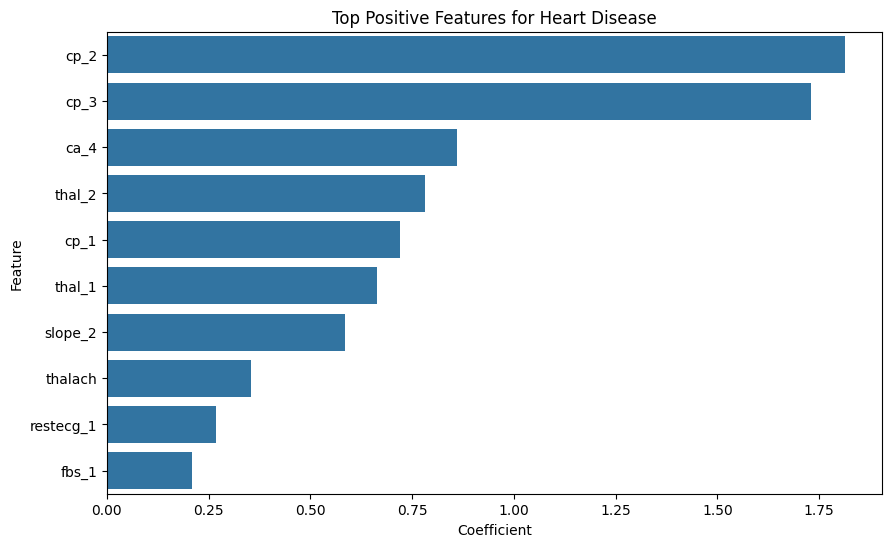

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title('Top Positive Features for Heart Disease')
plt.show()


## Model Evaluation, Threshold Tuning & Insights

### 1. Threshold Tuning Analysis

Logistic Regression outputs probabilities rather than direct class labels.  
By default, a threshold of **0.5** is used to convert probabilities into class predictions.  
However, in healthcare problems, **recall (catching all disease cases)** is often more important than precision.

We evaluated multiple thresholds:

| Threshold | Precision | Recall | F1-score |
|---------|-----------|--------|---------|
| 0.3 | 0.785 | **0.971** | 0.868 |
| 0.4 | 0.832 | **0.943** | **0.884** |
| 0.5 | 0.856 | 0.905 | 0.880 |
| 0.6 | **0.885** | 0.876 | 0.880 |

#### Key Observations:
- Lower thresholds significantly increase **recall**, reducing false negatives.
- Higher thresholds improve **precision**, reducing false positives.
- A threshold of **0.4 provides the best balance**, achieving:
  - High recall (94%)
  - Strong precision
  - Best F1-score

**Conclusion:**  
Threshold tuning allows aligning model behavior with medical priorities, where missing a disease case is riskier than a false alarm.

---

### 2. Regularization Comparison

We compared three Logistic Regression variants:

| Model | Accuracy | ROC-AUC |
|------|----------|--------|
| Baseline Logistic Regression | 0.873 | 0.944 |
| L2 Regularization (Ridge) | 0.873 | 0.944 |
| L1 Regularization (Lasso) | 0.873 | **0.945** |

#### Key Observations:
- All models show **consistent performance**, indicating no overfitting.
- Regularization does not significantly change accuracy, suggesting the dataset is well-structured.
- L1 regularization slightly improves ROC-AUC and helps identify important features.

**Conclusion:**  
Baseline Logistic Regression is already strong, and regularization mainly improves stability and interpretability.

---

### 3. Feature Importance Interpretation

Top features influencing heart disease prediction:

| Feature | Interpretation |
|-------|---------------|
| `cp_2`, `cp_3` | Chest pain types strongly associated with heart disease |
| `ca_4` | Higher number of major blood vessels increases risk |
| `thal_2`, `thal_1` | Abnormal thalassemia conditions |
| `slope_2` | Abnormal ST segment slope during exercise |
| `thalach` | Maximum heart rate achieved |
| `fbs_1` | Elevated fasting blood sugar |

#### Medical Insight:
- Chest pain type (`cp`) is the strongest predictor, aligning with clinical knowledge.
- Vessel count (`ca`) and stress-related indicators (`slope`, `thal`) are critical risk factors.
- These results confirm insights observed during EDA.

---

### 4. Overall Model Insights

- The model achieves **strong discrimination** (ROC-AUC ≈ 0.945).
- High recall makes it suitable for medical screening tasks.
- Feature importance is interpretable and clinically meaningful.
- Logistic Regression proves sufficient without complex models.

### Final Conclusion:
This project demonstrates how Logistic Regression, combined with proper preprocessing, threshold tuning, and evaluation, can deliver accurate, interpretable, and medically reliable predictions for heart disease detection.
